In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
from scipy.stats import norm
import statistics
import pylab
from scipy.stats import shapiro
from scipy.stats import wilcoxon
from scipy.stats import chi2_contingency 

# Ayiti Analytics Probability and Statistics Project

Use all the files to have a final datasets to have the following columns
   <ul>
    <li>questid</li>
    <li>gender</li>
    <li>age (age of applicant)</li>
    <li>communeName (use data prep in commune file)</li>
    <li>application_date (created at in quest file)</li>
    <li>enroll_date (created_at in enroll file)</li>
    <li>is_enroll (Yes/No) (use data prep in enroll file)</li>
    <li>Education Level</li>
   <li>Communication channels(hear_AA1)</li>
    <li>Bootcamp Insterest (after_AA)</li>
    <li>Payement Date (use ord and transaction files)</li>
    <li>Payed (Yes/No)</li>
    <li>list Technologies as columns based (use get_dummies)</li>
    <li>list  Study domains (use get_dummies)</li>
    <li>Job is formal</li>
    <li>Have computer at home</li>
    <li>Have internet at home</li>
    
   </ul>
   

In [332]:
enroll=pd.read_csv(r'enroll.csv')
industry=pd.read_csv(r'industry.csv')
ord1=pd.read_csv(r'ord.csv')
study_domain=pd.read_csv(r'study_domain.csv')
technology=pd.read_csv(r'technology.csv')
transaction=pd.read_csv(r'transaction.csv')
commune=pd.read_excel(r'commune.xlsx')
quest=pd.read_csv(r'quest.csv')

In [333]:
def fonksyon(a):
    return a.info()

In [334]:
fonksyon(enroll)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            148 non-null    int64  
 1   created_at            148 non-null    object 
 2   expiry_date           60 non-null     object 
 3   user_id               148 non-null    int64  
 4   course_name           148 non-null    object 
 5   course_id             148 non-null    int64  
 6   percentage_completed  148 non-null    float64
 7   completed_at          0 non-null      float64
 8   expired               148 non-null    bool   
 9   is_free_trial         148 non-null    bool   
 10  completed             148 non-null    bool   
 11  started_at            135 non-null    object 
 12  activated_at          77 non-null     object 
 13  updated_at            148 non-null    object 
 14  quest_id              102 non-null    object 
dtypes: bool(3), float64(2),

In [335]:
enroll.isnull().any()

Unnamed: 0              False
created_at              False
expiry_date              True
user_id                 False
course_name             False
course_id               False
percentage_completed    False
completed_at             True
expired                 False
is_free_trial           False
completed               False
started_at               True
activated_at             True
updated_at              False
quest_id                 True
dtype: bool

In [336]:
enroll.isnull().sum()

Unnamed: 0                0
created_at                0
expiry_date              88
user_id                   0
course_name               0
course_id                 0
percentage_completed      0
completed_at            148
expired                   0
is_free_trial             0
completed                 0
started_at               13
activated_at             71
updated_at                0
quest_id                 46
dtype: int64

In [337]:
industry.isnull().any()

Unnamed: 0    False
key           False
values        False
quest_id      False
dtype: bool

In [338]:
fonksyon(industry)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  807 non-null    int64 
 1   key         807 non-null    object
 2   values      807 non-null    object
 3   quest_id    807 non-null    object
dtypes: int64(1), object(3)
memory usage: 25.3+ KB


In [339]:
ord1.isnull().any()

Unnamed: 0                 False
created_at                 False
user_id                    False
product_name               False
product_id                 False
amount_dollars             False
amount_cents               False
subscription               False
coupon_code                 True
coupon_id                   True
affiliate_referral_code     True
status                     False
quest_id                    True
dtype: bool

In [340]:
fonksyon(ord1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               18 non-null     int64  
 1   created_at               18 non-null     object 
 2   user_id                  18 non-null     int64  
 3   product_name             18 non-null     object 
 4   product_id               18 non-null     int64  
 5   amount_dollars           18 non-null     int64  
 6   amount_cents             18 non-null     int64  
 7   subscription             18 non-null     bool   
 8   coupon_code              4 non-null      object 
 9   coupon_id                4 non-null      float64
 10  affiliate_referral_code  0 non-null      float64
 11  status                   18 non-null     object 
 12  quest_id                 14 non-null     object 
dtypes: bool(1), float64(2), int64(5), object(5)
memory usage: 1.8+ KB


In [341]:
quest.isnull().any()

Unnamed: 0            False
gender                False
dob                    True
commune               False
created_at            False
modified_at           False
department             True
education_level       False
university            False
study_domain          False
current_employed      False
formal_sector_job     False
have_computer_home    False
internet_at_home      False
hear_AA_1             False
after_AA              False
quest_id              False
dtype: bool

In [342]:
quest.isnull().sum()

Unnamed: 0            0
gender                0
dob                   6
commune               0
created_at            0
modified_at           0
department            1
education_level       0
university            0
study_domain          0
current_employed      0
formal_sector_job     0
have_computer_home    0
internet_at_home      0
hear_AA_1             0
after_AA              0
quest_id              0
dtype: int64

In [343]:
fonksyon(quest)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          250 non-null    int64 
 1   gender              250 non-null    object
 2   dob                 244 non-null    object
 3   commune             250 non-null    object
 4   created_at          250 non-null    object
 5   modified_at         250 non-null    object
 6   department          249 non-null    object
 7   education_level     250 non-null    object
 8   university          250 non-null    object
 9   study_domain        250 non-null    object
 10  current_employed    250 non-null    object
 11  formal_sector_job   250 non-null    object
 12  have_computer_home  250 non-null    object
 13  internet_at_home    250 non-null    object
 14  hear_AA_1           250 non-null    object
 15  after_AA            250 non-null    object
 16  quest_id            250 no

In [344]:
study_domain.isnull().any()

Unnamed: 0    False
key           False
values        False
quest_id      False
dtype: bool

In [345]:
fonksyon(study_domain)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  287 non-null    int64 
 1   key         287 non-null    object
 2   values      287 non-null    object
 3   quest_id    287 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.1+ KB


In [346]:
technology.isnull().any()

Unnamed: 0    False
key           False
values        False
quest_id      False
dtype: bool

In [347]:
fonksyon(technology)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  678 non-null    int64 
 1   key         678 non-null    object
 2   values      678 non-null    object
 3   quest_id    678 non-null    object
dtypes: int64(1), object(3)
memory usage: 21.3+ KB


In [348]:
transaction.isnull().any()

Unnamed: 0        False
created_at        False
modified_at       False
user_id           False
course_id         False
transaction_id    False
dtype: bool

In [349]:
fonksyon(transaction)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      60 non-null     int64 
 1   created_at      60 non-null     object
 2   modified_at     60 non-null     object
 3   user_id         60 non-null     int64 
 4   course_id       60 non-null     int64 
 5   transaction_id  60 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 2.9+ KB


In [350]:
commune.isnull().any()

Commune_en     False
Commune_FR     False
Commune_Id     False
Departement    False
ADM1_PCODE     False
dtype: bool

In [351]:
fonksyon(commune)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Commune_en   140 non-null    object
 1   Commune_FR   140 non-null    object
 2   Commune_Id   140 non-null    object
 3   Departement  140 non-null    object
 4   ADM1_PCODE   140 non-null    object
dtypes: object(5)
memory usage: 5.6+ KB


In [352]:
enroll.rename(columns = {"created_at": "enroll_date"}, inplace = True)
enroll['created_at']=enroll["enroll_date"]
enroll['is_enroll'] = np.where(enroll['enroll_date'].isna(), 'no', 'yes')

enroll=enroll[["enroll_date","is_enroll","quest_id", "user_id"]]


In [353]:
enroll

,enroll_date,is_enroll,quest_id,user_id
0,2020-12-12T06:41:29.844Z,yes,NaN,29816173
1,2020-12-13T14:41:17.720Z,yes,NaN,35229766
2,2020-12-15T00:53:06.499Z,yes,NaN,31987560
3,2020-12-18T18:38:55.683Z,yes,NaN,35616451
4,2020-12-21T14:45:06.528Z,yes,NaN,35390649
...,...,...,...,...
143,2021-03-14T02:16:08.736Z,yes,906b65e3-ce95-11eb-a294-7c67a234f601,41508160
144,2021-03-14T04:20:30.803Z,yes,906636cf-ce95-11eb-8679-7c67a234f601,41564742
145,2021-03-14T07:34:09.491Z,yes,906241d5-ce95-11eb-9850-7c67a234f601,41569249
146,2021-03-14T15:34:39.800Z,yes,906b3c86-ce95-11eb-b6a7-7c67a234f601,41587952


In [354]:
quest
quest.rename(columns = {"created_at": "payment_date"}, inplace = True)


In [355]:

quest.rename(columns = {"formal_sector_job": "job_is_formal"}, inplace = True)

In [356]:
quest=quest[["gender","dob","commune","payment_date","education_level","study_domain","internet_at_home","have_computer_home","hear_AA_1","after_AA","job_is_formal","quest_id"]]

In [357]:
# In this section we use the get_dummies() for data manipulation. We want to convert categorical data into dummy or indicator variable
study_domain1 = pd.get_dummies(data=study_domain[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
# After that we group the new indicator variable by thier quest_id which is common to all
study_domain2 = study_domain1.groupby("quest_id").sum()

In [358]:
# In this section we use the get_dummies() for data manipulation. We want to convert categorical data into dummy or indicator variable
technology1 = pd.get_dummies(technology[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
# After that we group the new indicator variable by thier quest_id which is common to all
technology2 = technology1.groupby("quest_id").sum()

In [359]:
# In this section we use the get_dummies() for data manipulation. We want to convert categorical data into dummy or indicator variable
industry1 = pd.get_dummies(data=industry[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
# After that we group the new indicator variable by thier quest_id which is common to all
industry2 = industry1.groupby("quest_id").sum()

In [360]:
#First, I start the merging of the dataset beginning with quest and enroll
result=pd.merge(left=quest, right=enroll, how = 'left',on='quest_id')
#Secondly,  I merge the old merging(result) with study_domain
result1=pd.merge(left=result, right=study_domain2, how = 'left',on='quest_id')
#Thirdly,  I merge the old merging(result1) with technology, and as so one
result2=pd.merge(left=result1, right=technology2, how = 'left',on='quest_id')
result3=pd.merge(left=result2, right=industry2, how = 'left',on='quest_id')


In [361]:
#I also change to lowercase the column "Commune_ID so that I can merge it"
commune["Commune_Id"] = commune["Commune_Id"].str.lower()
#I rename the column "Commune_ID to 'commune' so that I could merge it with the commune colum on the commune dataset and I persist the result on the dataset"
commune.rename(columns = {"Commune_Id":"commune"}, inplace = True)

In [362]:
#After that,  I merge the old merging(result3) with commune
result4=pd.merge(left=result3, right=commune[["Commune_FR","commune"]], how = 'left', on="commune")

#I slice the 9th first elements on the columns 'created_at'
result4["payment_date"] = result4["payment_date"].str[:10]

In [363]:
result4.columns

Index(['gender', 'dob', 'commune', 'payment_date', 'education_level',
       'study_domain', 'internet_at_home', 'have_computer_home', 'hear_AA_1',
       'after_AA', 'job_is_formal', 'quest_id', 'enroll_date', 'is_enroll',
       'user_id', 'Accounting', 'Computer Science', 'Economics',
       'Electrical Engineering', 'Law', 'Management', 'Medicine', 'Statistics',
       'other_x', 'Bash', 'Excel', 'Git', 'Java', 'JavaScript', 'PHP',
       'PowerBI or Tableau', 'Python', 'R', 'SQL', 'VBA', 'other_y',
       'Communications', 'Consulting', 'Education', 'Energy', 'Finance',
       'Healthcare', 'Insurance', 'Manufacturing', 'Marketing',
       'Public Sector/ Non-Profit Agencies', 'Retail/ E-Commerce',
       'Technology (Software/ Internet)', 'Transportation', 'other',
       'Commune_FR'],
      dtype='object')

In [364]:
# I concat the old merging(ord1) with transaction
resulta = pd.concat([ord1, transaction],axis=0)
#I print the shape of the new variable
resulta.shape

(78, 16)

In [365]:
#I create a column payed
resulta['payed'] = "yes"
resulta.head()

,Unnamed: 0,created_at,user_id,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id,modified_at,course_id,transaction_id,payed
0,0,2021-03-14T15:34:35.014Z,41587952,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,906b3c86-ce95-11eb-b6a7-7c67a234f601,NaN,NaN,NaN,yes
1,1,2021-03-14T04:20:23.483Z,41564742,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,906636cf-ce95-11eb-8679-7c67a234f601,NaN,NaN,NaN,yes
2,2,2021-03-12T19:29:22.832Z,41501853,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,906968f5-ce95-11eb-9e1a-7c67a234f601,NaN,NaN,NaN,yes
3,3,2021-03-12T14:23:11.154Z,40284930,Entwodiksyon Nan Syans Done,1100636.0,0.0,0.0,False,impact_hub_coupon,6658457.0,NaN,Complete,9060477c-ce95-11eb-ace3-7c67a234f601,NaN,NaN,NaN,yes
4,4,2021-03-11T16:01:17.901Z,40281483,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,9064ff29-ce95-11eb-a3d3-7c67a234f601,NaN,NaN,NaN,yes


In [366]:
#And then I merge the old merging "result4" with 'resulta'
result5 = pd.merge(left=result4, right=resulta, how = 'left',on='user_id')

In [367]:
# I replace the unsuported format with the good format so that I will have a date format
result5["dob"].replace({"3 aout 1977": "3/08/1977"}, inplace=True)
#I convert the new value into datetime
result5["dob"] = pd.to_datetime(result5["dob"])

In [368]:
#I also  convert the values in the columns "created_at" into datetime
result5["payment_date"] = pd.to_datetime(result5["payment_date"])

In [369]:
#I use this function to determine the age
result5["age"] = (-(result5["dob"]-result5["payment_date"])//365)

In [370]:
result5["age"] = result5["age"].apply(lambda x: str(x)[:2])

In [371]:
result5.columns

Index(['gender', 'dob', 'commune', 'payment_date', 'education_level',
       'study_domain', 'internet_at_home', 'have_computer_home', 'hear_AA_1',
       'after_AA', 'job_is_formal', 'quest_id_x', 'enroll_date', 'is_enroll',
       'user_id', 'Accounting', 'Computer Science', 'Economics',
       'Electrical Engineering', 'Law', 'Management', 'Medicine', 'Statistics',
       'other_x', 'Bash', 'Excel', 'Git', 'Java', 'JavaScript', 'PHP',
       'PowerBI or Tableau', 'Python', 'R', 'SQL', 'VBA', 'other_y',
       'Communications', 'Consulting', 'Education', 'Energy', 'Finance',
       'Healthcare', 'Insurance', 'Manufacturing', 'Marketing',
       'Public Sector/ Non-Profit Agencies', 'Retail/ E-Commerce',
       'Technology (Software/ Internet)', 'Transportation', 'other',
       'Commune_FR', 'Unnamed: 0', 'created_at', 'product_name', 'product_id',
       'amount_dollars', 'amount_cents', 'subscription', 'coupon_code',
       'coupon_id', 'affiliate_referral_code', 'status', 'quest_i

In [372]:
result5=result5[['gender','dob', 'payment_date', 'education_level',
       'study_domain', 'internet_at_home', 'have_computer_home', 'hear_AA_1',
       'after_AA', 'job_is_formal', 'quest_id_x', 'is_enroll',
       'Accounting', 'Computer Science', 'Economics', 'Electrical Engineering',
       'Law', 'Management', 'Medicine', 'Statistics', 'Bash',
       'Excel', 'Git', 'Java', 'JavaScript', 'PHP', 'PowerBI or Tableau',
       'Python', 'R', 'SQL', 'VBA', 'Commune_FR', 'age','payed']]
result5.shape

(250, 34)

In [373]:
#Rename a column
result5.rename(columns={"quest_id_x": "quest_id"}, inplace=1)

In [374]:
result5.dob = result5["dob"].fillna(value =result5.dob.mean())

In [375]:
#I use this function to determine the age
result5["age1"]=(result5["payment_date"] -result5["dob"])

In [376]:
result5["age1"] = result5["age1"]// np.timedelta64(1,"Y")

In [377]:
#Drop of two columns
result5.drop("age", axis=1, inplace=True)
result5.drop("dob", axis=1, inplace=True)

In [378]:
#I print all the columns
result5.columns

Index(['gender', 'payment_date', 'education_level', 'study_domain',
       'internet_at_home', 'have_computer_home', 'hear_AA_1', 'after_AA',
       'job_is_formal', 'quest_id', 'is_enroll', 'Accounting',
       'Computer Science', 'Economics', 'Electrical Engineering', 'Law',
       'Management', 'Medicine', 'Statistics', 'Bash', 'Excel', 'Git', 'Java',
       'JavaScript', 'PHP', 'PowerBI or Tableau', 'Python', 'R', 'SQL', 'VBA',
       'Commune_FR', 'payed', 'age1'],
      dtype='object')

In [379]:
#I look for the ages < 18 years old
result5[result5.age1<18]

,gender,payment_date,education_level,study_domain,internet_at_home,have_computer_home,hear_AA_1,after_AA,job_is_formal,quest_id,...,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,Commune_FR,payed,age1
25,male,2021-02-19,High School (16 years),['item1'],Yes,Yes,WhatsApp,Mentorship,Yes,906036c8-ce95-11eb-8c78-7c67a234f601,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Port-au-Prince,NaN,-1
92,male,2021-02-18,Other,['item1'],Yes,Yes,Friend,Improving my data analysis skills,unknown,9064923b-ce95-11eb-a771-7c67a234f601,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Delmas,NaN,-1
176,male,2021-02-19,Bachelors (bacc +4),['item1'],No,Yes,WhatsApp,Training to start my own company,unknown,9067e4c0-ce95-11eb-bebe-7c67a234f601,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Pétion-Ville,NaN,0
209,female,2021-02-16,Other,['other'],No,No,WhatsApp,Improving my data analysis skills,unknown,9069a205-ce95-11eb-be5a-7c67a234f601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Les Cayes,NaN,1
210,female,2021-02-17,Other,['item1'],Yes,Yes,ESIH,Improving my data analysis skills,unknown,9069a206-ce95-11eb-9c6f-7c67a234f601,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Cité Soleil,NaN,-1
219,male,2021-02-19,Bachelors (bacc +4),['other'],Yes,Yes,Facebook,Finding a job/internship,unknown,9069ddd8-ce95-11eb-b0fb-7c67a234f601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sainte Suzanne,NaN,-1
229,male,2021-02-20,Bachelors (bacc +4),['item6'],Yes,Yes,Facebook,Improving my data analysis skills,Yes,906a52b4-ce95-11eb-b9bd-7c67a234f601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ouanaminthe,NaN,-1


In [380]:
#I replace the ages<18 years old by the mean
result5['age1']=np.where(result5['age1'].le(18), result5['age1'].mean(),result5['age1'] )

In [381]:
#result5[result5.age1<18]

In [382]:
#We define a function that can generate barchart
def generate_barchart(data=result5, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6),horizontal=True):
  plt.figure(figsize=figsize)
  if horizontal:
      axes = sns.barplot(data=data,x=abs_value,y=data.index)
      i=0
      for tot, perc in zip(data[abs_value],data[rel_value]):
        axes.text(tot/2,
                  i,
                  str(np.round(perc*100,2))+ "%",
                    fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
                  )
        axes.text(tot+3,
                  i,
                  str(tot),
                    fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
                  )
        
        i+=1
      plt.title(title)
      plt.show()
  else:
        axes = sns.barplot(data=data,y=abs_value,x=data.index)
        i=0
        for tot, perc in zip(data[abs_value],data[rel_value]):
          axes.text(i,
                    tot/2,
                    str(np.round(perc*100,2))+ "%",
                      fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
                    )
          axes.text(i,
                    tot+3,
                    str(tot),
                      fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
                    )
          
          i+=1
        plt.title(title)
        plt.show()  

In [383]:
#Thes fucntion will show the plot and will show the probability
def prob_category(data,top_n =6,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=(10,20),horizontal=True):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1).head(top_n)
   else:
     result = pd.concat([res1,res2],axis=1).head(top_n)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =figsize,horizontal=horizontal)
     return result


In [384]:
#I fill the NaN values in the column payed by "no"
result5.payed = result5["payed"].fillna(value ="no")

###  1. How many observations and variables are there in the dataset
 

In [385]:
# here your codes
result5.shape
#The shape of the dataset is (250,33)

(250, 33)

### 2.A Calculate the average age of the observations
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset
   

In [386]:
# here your codes
result5.age1.mean()

27.258975999999997

The average age on the whole dataset is 27.258975

In [387]:
result5.groupby('gender')['age1'].mean()
#The average age on the dataset by gender

gender
female    26.211404
male      27.501517
Name: age1, dtype: float64

In [388]:
a=result5[result5.gender=="male"]
#The male dataset is define a


In [389]:
a.age1.mean()

27.50151724137931

The average age on the male dataset is 27.501517

In [390]:

b=result5[result5.gender=="female"]
#The female dataset is define by b

In [391]:
b.age1.mean()

26.211404255319152

The average age on the female dataset is 26.211404

### 2.B Calculate 
   * variance of the whole datatset,male and female
   * kurtosis of the whole datatset,male and female
   * skewness of the whole datatset,male and female

In [392]:
variance_total=statistics.variance(result5['age1'])
variance_total


29.45581144520482

The variance on the whole dataset is 29.455811

In [393]:
variance_male=statistics.variance(a.age1)
variance_male

29.75069146876067

the variance on the male dataset is 29.750691

In [394]:
variance_female=statistics.variance(b.age1)
variance_female

27.420381202590193

the variance on the female dataset is 27.420381

In [395]:
#kurtosis
import scipy.stats as stats
from scipy.stats import kurtosis
result5.kurtosis()
#kurtosis on the whole dataset
#Kurtosis is a measure of whether or not a distribution is heavy-tailed or light-tailed relative to a normal distribution.

#The kurtosis of a normal distribution is 3.
#If a given distribution has a kurtosis less than 3, it is said to be playkurtic, which means it tends to produce fewer and less extreme outliers than the normal distribution.
#If a given distribution has a kurtosis greater than 3, it is said to be leptokurtic, which means it tends to produce more outliers than the normal distribution.

Accounting                15.730040
Computer Science          -1.822324
Economics                  3.647483
Electrical Engineering    57.206719
Law                       15.730040
Management                 1.835220
Medicine                  36.459207
Statistics                 8.116408
Bash                      19.872111
Excel                      0.931824
Git                        4.622554
Java                      -1.268769
JavaScript                -0.176375
PHP                       -0.770119
PowerBI or Tableau        11.592858
Python                    -0.876392
R                          2.208377
SQL                       -1.650399
VBA                       22.635079
age1                       2.691457
dtype: float64

In [396]:
a.kurtosis()
#kurtosis on the male dataset 

Accounting                15.165977
Computer Science          -1.916429
Economics                  3.824075
Electrical Engineering    45.446321
Law                       23.810039
Management                 1.822540
Medicine                  35.347127
Statistics                 8.459235
Bash                      17.517002
Excel                      0.771724
Git                        3.867245
Java                      -1.220049
JavaScript                -0.282823
PHP                       -1.066511
PowerBI or Tableau         9.486977
Python                    -0.952055
R                          2.586227
SQL                       -1.764333
VBA                       17.517002
age1                       2.555506
dtype: float64

In [397]:
b.kurtosis()
#kurtosis on the female dataset

Accounting                20.819259
Computer Science          -0.978281
Economics                  3.462183
Electrical Engineering     0.000000
Law                        5.178817
Management                 2.246234
Medicine                  47.000000
Statistics                 7.770402
Bash                      46.000000
Excel                      2.099993
Git                       11.771965
Java                      -1.477597
JavaScript                 0.538826
PHP                        2.099993
PowerBI or Tableau        46.000000
Python                    -0.420582
R                          1.216445
SQL                       -0.766929
VBA                        0.000000
age1                       4.405175
dtype: float64

In [398]:
#Skewness
result5.skew()
#Skewness on the whole dataset

Accounting                4.195375
Computer Science          0.438955
Economics                 2.370159
Electrical Engineering    7.664063
Law                       4.195375
Management                1.954545
Medicine                  6.177412
Statistics                3.170165
Bash                      4.659323
Excel                    -1.710045
Git                       2.566073
Java                      0.861219
JavaScript                1.350977
PHP                       1.111873
PowerBI or Tableau        3.673949
Python                    1.063419
R                         2.047033
SQL                       0.602658
VBA                       4.944654
age1                      1.506350
dtype: float64

In [399]:
a.skew()
#Skewness on the male dataset

Accounting                4.124573
Computer Science          0.321142
Economics                 2.405276
Electrical Engineering    6.854562
Law                       5.056521
Management                1.950420
Medicine                  6.081806
Statistics                3.220785
Bash                      4.397744
Excel                    -1.662537
Git                       2.414184
Java                      0.890156
JavaScript                1.311540
PHP                       0.971784
PowerBI or Tableau        3.375092
Python                    1.028428
R                         2.135464
SQL                       0.503579
VBA                       4.397744
age1                      1.446218
dtype: float64

In [400]:
b.skew()
#Skewness on the female dataset

Accounting                4.683414
Computer Science          1.032104
Economics                 2.305769
Electrical Engineering    0.000000
Law                       2.638198
Management                2.037747
Medicine                  6.855655
Statistics                3.072669
Bash                      6.782330
Excel                    -2.002632
Git                       3.641645
Java                      0.767231
JavaScript                1.586604
PHP                       2.002632
PowerBI or Tableau        6.782330
Python                    1.264775
R                         1.779168
SQL                       1.126225
VBA                       0.000000
age1                      1.927113
dtype: float64

### 2.C Does the age distribution follow a normal distribution 
   

There are two ways to test normality,
1. Graphs for Normality test
2. Statistical Tests for Normality
# Graphs for Normality test
Various graphs can be used to test the normality of a variable. Using graphs/plots we can visually see the normality but graphs are not very accurate as statistical methods.

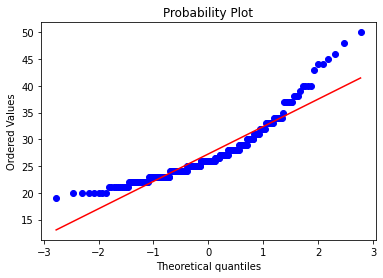

In [401]:

stats.probplot(result5["age1"], dist="norm", plot=pylab)
pylab.show()

Q Q or Quantile-Quantile Plot
It plots two sets of quantiles against one another i.e. theoretical quantiles against the actual quantiles of the variable.
If our data comes from a normal distribution, we should see all the points sitting on the straight line. In this case we can see that the distribution is not normal.

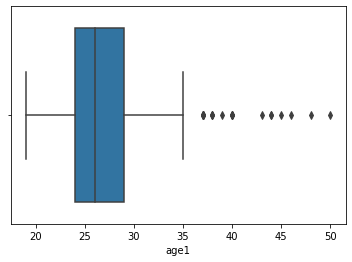

In [402]:
ax=sns.boxplot(x=result5.age1)

Box Plot
Box Plot also know as a box and whisker plot is another way to visualize the normality of a variable. It displays the distribution of data based on a five-number summary i.e. minimum, first quartile (Q1), median (Q2), third quartile (Q3) and maximum.
If your variable has a normal distribution, we should see the mean and median in the center. But it's not the case in this example. We can notice that the mean and median are not in the center.

# Statistical Tests for Normality
On the other hand, there are many Statistical Tests to check if the distribution of a variable is normal/gaussian. In this section, I am not gonna talk about the math behind but I will show you the python code for each test.

In [403]:

stat, p =shapiro(result5.age1)
print('stat=%.15f,p=%.15f\n'% (stat,p))
if  p> 0.05:
    print("probably Gaussian")
else:
    print("probably  not Gaussian")

stat=0.876894533634186,p=0.000000000000249

probably  not Gaussian


Shapiro-Wilk Test
We should start with the Shapiro-Wilk Test. It is the most powerful test to check the normality of a variable.
If the p-value ≤ 0.05, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.
If the p-value > 0.05, then we fail to reject the null hypothesis i.e. we assume the distribution of our variable is normal/gaussian.
In  this case the p-value is <0.05, that implies that the distribution is not Gaussian or normal.

### 3.Display the age frequency disbrution
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset

In [404]:
#display(result5.age1.value_counts(normalize=True).to_frame())
#result['frequency']=result5.age1/result.shape[0]
prob_category(data=result5,top_n =100,col="age1", abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=(10,20),horizontal=False)

,Total,Percent
24.000,27,0.108
26.000,26,0.104
23.000,26,0.104
25.000,24,0.096
28.000,18,0.072
22.000,16,0.064
27.000,15,0.060
29.000,12,0.048
21.000,10,0.040
30.000,9,0.036


In [405]:
#result5["e"]=(a.age1/result5.shape[0]).to_frame()
result5["e"]=(a.age1)


In [406]:
prob_category(data=result5,top_n =100,col="e", abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=(10,20),horizontal=False)

,Total,Percent
24.000,24,0.118227
25.000,21,0.103448
23.000,21,0.103448
26.000,18,0.088670
28.000,15,0.073892
27.000,13,0.064039
29.000,10,0.049261
30.000,9,0.044335
33.000,8,0.039409
22.000,8,0.039409


In [407]:
#result5["f"]=b.age1/result5.shape[0]
result5["f"]=b.age1

In [408]:
prob_category(data=result5,top_n =100,col="f", abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=(10,20),horizontal=False)

,Total,Percent
26.000,8,0.170213
22.000,8,0.170213
23.000,5,0.106383
25.000,3,0.063830
21.000,3,0.063830
28.000,3,0.063830
24.000,3,0.063830
27.000,2,0.042553
29.000,2,0.042553
32.000,2,0.042553


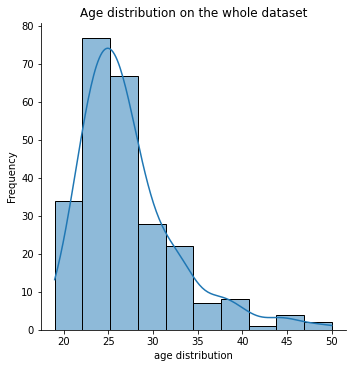

In [409]:
#Age distribution on the whole dataset
ax = sns.displot(result5.age1,
                  bins=10,
                  kde=True,
                  color=None)
ax.set(xlabel='age distribution', ylabel='Frequency', title="Age distribution on the whole dataset")

In [410]:
#result5.groupby('gender').age1.plot(kind='kde')


In [411]:
#result5.groupby('gender')['age1'].hist()
ax = sns.displot(a.age1,
                  bins=5,
                  kde=True,
                  color=None)
ax.set(xlabel='age distribution', ylabel='Frequency', title="Age distribution on the male dataset)

SyntaxError: EOL while scanning string literal (<ipython-input-411-c13f2b2a95d0>, line 6)

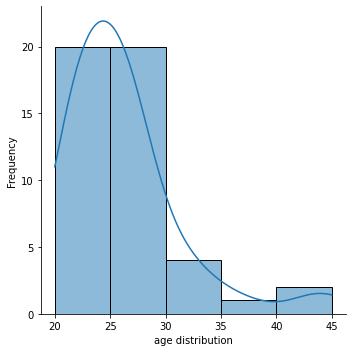

In [ ]:
#result5.groupby('gender')['age1'].plot()
ax = sns.displot(b.age1,
                  bins=5,
                  kde=True,
                  color=None)
ax.set(xlabel='age distribution', ylabel='Frequency', title="Age distribution on the female dataset)

### 4. Can we say that the average age (24 years old) of the observations can be considered as the average age of the population likely to participate in this bootcamp. Justify your answer

#H0 The average age of the observations can be considered as the average age of the population

#HA The average age of the observations can't be considered as the average age of the population

In [ ]:
#here your codes

#from scipy import stats
#stats.ttest_1samp(result5["age1"],24)
#w, p = wilcoxon(result5["age1"])
#H0 we suppose that the average age of the observations can be considered as the average age of the population
#HA The average age of the observations can't be considered as the average age of the population
z_statistic, p_value = wilcoxon(24 -result5["age1"])
if  p_value< 0.05:
    print("we reject the null hypothesis H0 ")
else:
    print("we accept the null hypothesis H0")

print ("paired wilcoxon-test", p_value)

we reject the null hypothesis H0 
paired wilcoxon-test 1.9373322608272278e-18


HA The average age of the observations can't be considered as the average age of the population

### 5. Calculate the average age of participants for each communication channel

In [ ]:
#here your codes
AverAge=result5.groupby('hear_AA_1')['age1'].mean()
AverAge.to_frame()
#The average age of participants for each communication channel

,age1
hear_AA_1,
Ayiti Analytics Website,27.000000
Bootcamp Alumni,26.285714
ESIH,25.081556
Facebook,27.398400
Friend,27.103522
Instagram,24.400000
LinkedIn,29.933333
WhatsApp,27.718242
other,28.444444


### 6. Display an age boxplot for each communication channel

Text(0, 0.5, 'age of the participants')

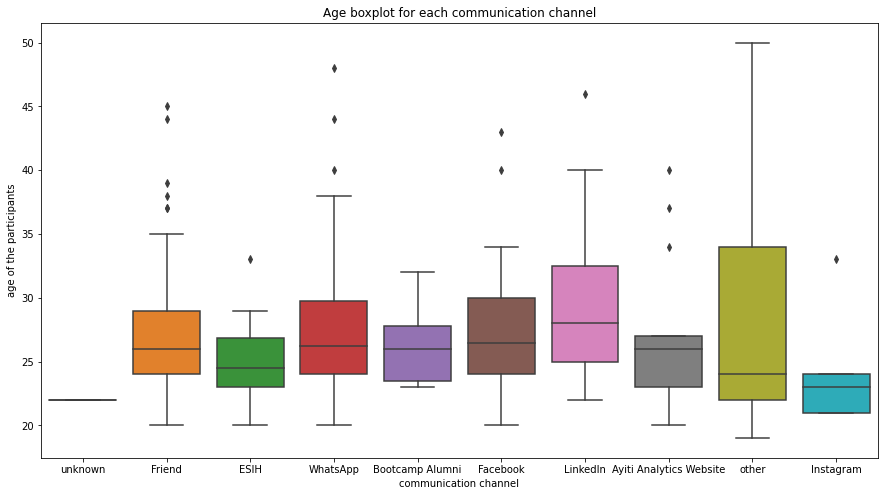

In [ ]:
#here your codes
#result5.groupby('hear_AA_1')['age1'].plot()
plt.figure(figsize=(15,8))
sns.boxplot(y="age1", x="hear_AA_1", data=result5, orient='v')
plt.title("Age boxplot for each communication channel")
plt.xlabel("communication channel")
plt.ylabel("age of the participants")
#An age boxplot for each communication channel

We can notice that the mean age is not the same for each communication channel. The mean age for each communication channel varies between 20 and 30. 

### 7 .Is there a significant age difference between these groups

In [ ]:
#here your codes
# H0 There is no significant age diference beetween these groups
# HA There is a significant age difference between these groups
WhatsApp1 = result5[result5.hear_AA_1 == "WhatsApp"].age1
unknown1 = result5[result5.hear_AA_1 == "unknown"].age1
Friends1 = result5[result5.hear_AA_1 == "Friend"].age1
ESIH1 = result5[result5.hear_AA_1 == "ESIH"].age1  
Bootcamp_Alumni1 = result5[result5.hear_AA_1 == "Bootcamp Alumni"].age1  
Facebook1 = result5[result5.hear_AA_1 == "Facebook"].age1  
LinkedIn1 = result5[result5.hear_AA_1 == "LinkedIn"].age1  
Ayiti_Analytics_Website1 = result5[result5.hear_AA_1 == "Ayiti Analytics Website"].age1
other1 = result5[result5.hear_AA_1 == "other"].age1 
Instagram1 = result5[result5.hear_AA_1 == "Instagram"].age1   
F,pvalue = stats.f_oneway(WhatsApp1,unknown1,Friends1,ESIH1,Bootcamp_Alumni1,Facebook1,LinkedIn1,Ayiti_Analytics_Website1,other1,Instagram1)
print(f"Statistic F = {F} and pvalue = {pvalue}")
if pvalue> 0.05:
    print("we accept the null hypothesis, that means there is no significant age diference beetween these groups")
else:
    print("We reject the null hypothesis that means there is a significant age diference beetween these groups")

'fvalue, pvalue = stats.f_oneway( result5.age1,result5.hear_AA_1)\nprint(fvalue, pvalue)\nimport statsmodels.stats.multicomp as mc\ncomp = mc.MultiComparison(result5["age1"],result5["hear_AA_1"])\npost_hoc_res = comp.tukeyhsd()\npost_hoc_res.summary()\n'

### 8.Plan a BA strategy for each communication channel regarding the age group

In [ ]:
AverAge.to_frame()

,age1
hear_AA_1,
Ayiti Analytics Website,27.000000
Bootcamp Alumni,26.285714
ESIH,25.081556
Facebook,27.398400
Friend,27.103522
Instagram,24.400000
LinkedIn,29.933333
WhatsApp,27.718242
other,28.444444


There is no significant age difference between these groups. So the BA strategy that we will plan for one will be valuable for all of them. As a BA strategy, I will advise them to segment the market, because most of the applicants have their age between 20 to 30  years old. It will be easier to convince them to participate to the bootcamp. Because they have shown so much interest for this field. Now we can notice that applicants who have used Ayiti Analytics website, Bootcamp Alumni, ESIH, Friend, whatsapp and linkedin have their mean age very close of the mean age of the dataset. So I suggest them to focus their marketing or ads on these channels.

### 9.According to the observations what is the probability of being in each channel of communication knowing your are a woman

In [ ]:
#here your codes
res =result5.gender.value_counts(normalize=True).to_frame()
display(res)
gender_table = pd.pivot_table(result5,'age1',index='hear_AA_1',columns=['gender'],aggfunc = ['count'],fill_value=0)
my_pivot = gender_table.sort_values(by= ('count','female'),ascending = False)
my_pivot['Probabilty of being female and being in each communications channels'] =gender_table[('count','female')]/result5.shape[0]
my_pivot['Probabilty of being male and being in each communications channels'] = gender_table[('count','male')]/result5.shape[0]
my_pivot=my_pivot.loc[:,['Probabilty of being female and being in each communications channels','Probabilty of being male and being in each communications channels']]
display(my_pivot)
my_pivot['male'] =my_pivot['Probabilty of being male and being in each communications channels']/ res.loc["male","gender"]
my_pivot['female'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["female","gender"]
my_pivot.loc[:,['female']]


### 10.According to the observations what is the probability of being in each channel of communication knowing your are a man

In [ ]:
#here your codes
res =result5.gender.value_counts(normalize=True).to_frame()
display(res)
gender_table = pd.pivot_table(result5,'age1',index='hear_AA_1',columns=['gender'],aggfunc = ['count'],fill_value=0)
my_pivot = gender_table.sort_values(by= ('count','female'),ascending = False)
my_pivot['Probabilty of being female and being in each communications channels'] =gender_table[('count','female')]/result5.shape[0]
my_pivot['Probabilty of being male and being in each communications channels'] = gender_table[('count','male')]/result5.shape[0]
my_pivot=my_pivot.loc[:,['Probabilty of being female and being in each communications channels','Probabilty of being male and being in each communications channels']]
display(my_pivot)
my_pivot['male'] =my_pivot['Probabilty of being male and being in each communications channels']/ res.loc["male","gender"]
my_pivot['female'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["female","gender"]
my_pivot.loc[:,['male']]

,gender
male,0.812
female,0.188


,Probabilty of being female and being in each communications channels,Probabilty of being male and being in each communications channels
gender,,
hear_AA_1,,
Friend,0.044,0.224
WhatsApp,0.036,0.228
Bootcamp Alumni,0.032,0.024
Facebook,0.024,0.136
ESIH,0.020,0.052
Ayiti Analytics Website,0.016,0.044
other,0.008,0.028
Instagram,0.004,0.016


,male
gender,
hear_AA_1,
Friend,0.275862
WhatsApp,0.280788
Bootcamp Alumni,0.029557
Facebook,0.167488
ESIH,0.064039
Ayiti Analytics Website,0.054187
other,0.034483
Instagram,0.019704


### 11. Deduce the probability of being a woman knowing each communication channel

In [ ]:
#here your codes
gender_table = pd.crosstab(result5.gender, result5["hear_AA_1"], margins=True, normalize="columns")
for col in gender_table.columns:
  print(f"The proba of being a woman knowing knowing {col} is: {round(gender_table.at['female', col], 3)}")

The proba of being a woman knowing knowing Ayiti Analytics Website is: 0.267
The proba of being a woman knowing knowing Bootcamp Alumni is: 0.571
The proba of being a woman knowing knowing ESIH is: 0.278
The proba of being a woman knowing knowing Facebook is: 0.15
The proba of being a woman knowing knowing Friend is: 0.164
The proba of being a woman knowing knowing Instagram is: 0.2
The proba of being a woman knowing knowing LinkedIn is: 0.067
The proba of being a woman knowing knowing WhatsApp is: 0.136
The proba of being a woman knowing knowing other is: 0.222
The proba of being a woman knowing knowing unknown is: 0.0
The proba of being a woman knowing knowing All is: 0.188


In [ ]:
#here your codes
res =result5.hear_AA_1.value_counts(normalize=True).to_frame()
display(res)
gender_table = pd.pivot_table(result5,'age1',index='hear_AA_1',columns=['gender'],aggfunc = ['count'],fill_value=0)
my_pivot = gender_table.sort_values(by= ('count','female'),ascending = False)
my_pivot['Probabilty of being female and being in each communications channels'] =gender_table[('count','female')]/result5.shape[0]
my_pivot['Probabilty of being male and being in each communications channels'] = gender_table[('count','male')]/result5.shape[0]
my_pivot=my_pivot.loc[:,['Probabilty of being female and being in each communications channels','Probabilty of being male and being in each communications channels']]
display(my_pivot)
my_pivot['Friend'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["Friend","hear_AA_1"]
my_pivot['WhatsApp'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["WhatsApp","hear_AA_1"]
my_pivot['Facebook'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["Facebook","hear_AA_1"]
my_pivot['ESIH'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["ESIH","hear_AA_1"]
my_pivot['LinkedIn'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["LinkedIn","hear_AA_1"]
my_pivot['Ayiti Analytics Website'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["Ayiti Analytics Website","hear_AA_1"]
my_pivot['Bootcamp Alumni'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["Bootcamp Alumni","hear_AA_1"]
my_pivot['other'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["other","hear_AA_1"]
my_pivot['Instagram'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["Instagram","hear_AA_1"]
my_pivot['unknown'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["unknown","hear_AA_1"]
my_pivot.loc[:,['Friend','WhatsApp','Facebook','ESIH','LinkedIn','Ayiti Analytics Website','Bootcamp Alumni','other','Instagram','unknown']]


,hear_AA_1
Friend,0.268
WhatsApp,0.264
Facebook,0.160
ESIH,0.072
Ayiti Analytics Website,0.060
LinkedIn,0.060
Bootcamp Alumni,0.056
other,0.036
Instagram,0.020
unknown,0.004


,Probabilty of being female and being in each communications channels,Probabilty of being male and being in each communications channels
gender,,
hear_AA_1,,
Friend,0.044,0.224
WhatsApp,0.036,0.228
Bootcamp Alumni,0.032,0.024
Facebook,0.024,0.136
ESIH,0.020,0.052
Ayiti Analytics Website,0.016,0.044
other,0.008,0.028
Instagram,0.004,0.016


,Friend,WhatsApp,Facebook,ESIH,LinkedIn,Ayiti Analytics Website,Bootcamp Alumni,other,Instagram,unknown
gender,,,,,,,,,,
hear_AA_1,,,,,,,,,,
Friend,0.164179,0.166667,0.275,0.611111,0.733333,0.733333,0.785714,1.222222,2.2,11.0
WhatsApp,0.134328,0.136364,0.225,0.500000,0.600000,0.600000,0.642857,1.000000,1.8,9.0
Bootcamp Alumni,0.119403,0.121212,0.200,0.444444,0.533333,0.533333,0.571429,0.888889,1.6,8.0
Facebook,0.089552,0.090909,0.150,0.333333,0.400000,0.400000,0.428571,0.666667,1.2,6.0
ESIH,0.074627,0.075758,0.125,0.277778,0.333333,0.333333,0.357143,0.555556,1.0,5.0
Ayiti Analytics Website,0.059701,0.060606,0.100,0.222222,0.266667,0.266667,0.285714,0.444444,0.8,4.0
other,0.029851,0.030303,0.050,0.111111,0.133333,0.133333,0.142857,0.222222,0.4,2.0
Instagram,0.014925,0.015152,0.025,0.055556,0.066667,0.066667,0.071429,0.111111,0.2,1.0


### 13. Deduce the probability of being a woman knowing each communication channel

In [ ]:
# here your codes
res =result5.hear_AA_1.value_counts(normalize=True).to_frame()
display(res)
gender_table = pd.pivot_table(result5,'age1',index='hear_AA_1',columns=['gender'],aggfunc = ['count'],fill_value=0)
my_pivot = gender_table.sort_values(by= ('count','female'),ascending = False)
my_pivot['Probabilty of being female and being in each communications channels'] =gender_table[('count','female')]/result5.shape[0]
my_pivot['Probabilty of being male and being in each communications channels'] = gender_table[('count','male')]/result5.shape[0]
my_pivot=my_pivot.loc[:,['Probabilty of being female and being in each communications channels','Probabilty of being male and being in each communications channels']]
display(my_pivot)
my_pivot['Friend'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["Friend","hear_AA_1"]
my_pivot['WhatsApp'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["WhatsApp","hear_AA_1"]
my_pivot['Facebook'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["Facebook","hear_AA_1"]
my_pivot['ESIH'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["ESIH","hear_AA_1"]
my_pivot['LinkedIn'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["LinkedIn","hear_AA_1"]
my_pivot['Ayiti Analytics Website'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["Ayiti Analytics Website","hear_AA_1"]
my_pivot['Bootcamp Alumni'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["Bootcamp Alumni","hear_AA_1"]
my_pivot['other'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["other","hear_AA_1"]
my_pivot['Instagram'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["Instagram","hear_AA_1"]
my_pivot['unknown'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["unknown","hear_AA_1"]
my_pivot.loc[:,['Friend','WhatsApp','Facebook','ESIH','LinkedIn','Ayiti Analytics Website','Bootcamp Alumni','other','Instagram','unknown']]

,hear_AA_1
Friend,0.268
WhatsApp,0.264
Facebook,0.160
ESIH,0.072
Ayiti Analytics Website,0.060
LinkedIn,0.060
Bootcamp Alumni,0.056
other,0.036
Instagram,0.020
unknown,0.004


,Probabilty of being female and being in each communications channels,Probabilty of being male and being in each communications channels
gender,,
hear_AA_1,,
Friend,0.044,0.224
WhatsApp,0.036,0.228
Bootcamp Alumni,0.032,0.024
Facebook,0.024,0.136
ESIH,0.020,0.052
Ayiti Analytics Website,0.016,0.044
other,0.008,0.028
Instagram,0.004,0.016


,Friend,WhatsApp,Facebook,ESIH,LinkedIn,Ayiti Analytics Website,Bootcamp Alumni,other,Instagram,unknown
gender,,,,,,,,,,
hear_AA_1,,,,,,,,,,
Friend,0.164179,0.166667,0.275,0.611111,0.733333,0.733333,0.785714,1.222222,2.2,11.0
WhatsApp,0.134328,0.136364,0.225,0.500000,0.600000,0.600000,0.642857,1.000000,1.8,9.0
Bootcamp Alumni,0.119403,0.121212,0.200,0.444444,0.533333,0.533333,0.571429,0.888889,1.6,8.0
Facebook,0.089552,0.090909,0.150,0.333333,0.400000,0.400000,0.428571,0.666667,1.2,6.0
ESIH,0.074627,0.075758,0.125,0.277778,0.333333,0.333333,0.357143,0.555556,1.0,5.0
Ayiti Analytics Website,0.059701,0.060606,0.100,0.222222,0.266667,0.266667,0.285714,0.444444,0.8,4.0
other,0.029851,0.030303,0.050,0.111111,0.133333,0.133333,0.142857,0.222222,0.4,2.0
Instagram,0.014925,0.015152,0.025,0.055556,0.066667,0.066667,0.071429,0.111111,0.2,1.0


### 14. Deduce the probability of being a man knowing each communication channel

In [ ]:
#here your codes
gender_table = pd.crosstab(result5.gender, result5["hear_AA_1"], margins=True, normalize="columns")
for col in gender_table.columns:
  print(f"The proba of being a woman knowing knowing {col} is: {round(gender_table.at['male', col], 3)}")

The proba of being a woman knowing knowing Ayiti Analytics Website is: 0.733
The proba of being a woman knowing knowing Bootcamp Alumni is: 0.429
The proba of being a woman knowing knowing ESIH is: 0.722
The proba of being a woman knowing knowing Facebook is: 0.85
The proba of being a woman knowing knowing Friend is: 0.836
The proba of being a woman knowing knowing Instagram is: 0.8
The proba of being a woman knowing knowing LinkedIn is: 0.933
The proba of being a woman knowing knowing WhatsApp is: 0.864
The proba of being a woman knowing knowing other is: 0.778
The proba of being a woman knowing knowing unknown is: 1.0
The proba of being a woman knowing knowing All is: 0.812


In [ ]:

#here your codes
res =result5.hear_AA_1.value_counts(normalize=True).to_frame()
display(res)
gender_table = pd.pivot_table(result5,'age1',index='hear_AA_1',columns=['gender'],aggfunc = ['count'],fill_value=0)
my_pivot = gender_table.sort_values(by= ('count','female'),ascending = False)
my_pivot['Probabilty of being female and being in each communications channels'] =gender_table[('count','female')]/result5.shape[0]
my_pivot['Probabilty of being male and being in each communications channels'] = gender_table[('count','male')]/result5.shape[0]
my_pivot=my_pivot.loc[:,['Probabilty of being female and being in each communications channels','Probabilty of being male and being in each communications channels']]
display(my_pivot)
my_pivot['Friend'] =my_pivot['Probabilty of being male and being in each communications channels']/ res.loc["Friend","hear_AA_1"]
my_pivot['WhatsApp'] =my_pivot['Probabilty of being male and being in each communications channels']/ res.loc["WhatsApp","hear_AA_1"]
my_pivot['Facebook'] =my_pivot['Probabilty of being male and being in each communications channels']/ res.loc["Facebook","hear_AA_1"]
my_pivot['ESIH'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["ESIH","hear_AA_1"]
my_pivot['LinkedIn'] =my_pivot['Probabilty of being male and being in each communications channels']/ res.loc["LinkedIn","hear_AA_1"]
my_pivot['Ayiti Analytics Website'] =my_pivot['Probabilty of being male and being in each communications channels']/ res.loc["Ayiti Analytics Website","hear_AA_1"]
my_pivot['Bootcamp Alumni'] =my_pivot['Probabilty of being male and being in each communications channels']/ res.loc["Bootcamp Alumni","hear_AA_1"]
my_pivot['other'] =my_pivot['Probabilty of being male and being in each communications channels']/ res.loc["other","hear_AA_1"]
my_pivot['Instagram'] =my_pivot['Probabilty of being male and being in each communications channels']/ res.loc["Instagram","hear_AA_1"]
my_pivot['unknown'] =my_pivot['Probabilty of being male and being in each communications channels']/ res.loc["unknown","hear_AA_1"]
my_pivot.loc[:,['Friend','WhatsApp','Facebook','ESIH','LinkedIn','Ayiti Analytics Website','Bootcamp Alumni','other','Instagram','unknown']]

,hear_AA_1
Friend,0.268
WhatsApp,0.264
Facebook,0.160
ESIH,0.072
Ayiti Analytics Website,0.060
LinkedIn,0.060
Bootcamp Alumni,0.056
other,0.036
Instagram,0.020
unknown,0.004


,Probabilty of being female and being in each communications channels,Probabilty of being male and being in each communications channels
gender,,
hear_AA_1,,
Friend,0.044,0.224
WhatsApp,0.036,0.228
Bootcamp Alumni,0.032,0.024
Facebook,0.024,0.136
ESIH,0.020,0.052
Ayiti Analytics Website,0.016,0.044
other,0.008,0.028
Instagram,0.004,0.016


,Friend,WhatsApp,Facebook,ESIH,LinkedIn,Ayiti Analytics Website,Bootcamp Alumni,other,Instagram,unknown
gender,,,,,,,,,,
hear_AA_1,,,,,,,,,,
Friend,0.835821,0.848485,1.400,0.611111,3.733333,3.733333,4.000000,6.222222,11.2,56.0
WhatsApp,0.850746,0.863636,1.425,0.500000,3.800000,3.800000,4.071429,6.333333,11.4,57.0
Bootcamp Alumni,0.089552,0.090909,0.150,0.444444,0.400000,0.400000,0.428571,0.666667,1.2,6.0
Facebook,0.507463,0.515152,0.850,0.333333,2.266667,2.266667,2.428571,3.777778,6.8,34.0
ESIH,0.194030,0.196970,0.325,0.277778,0.866667,0.866667,0.928571,1.444444,2.6,13.0
Ayiti Analytics Website,0.164179,0.166667,0.275,0.222222,0.733333,0.733333,0.785714,1.222222,2.2,11.0
other,0.104478,0.106061,0.175,0.111111,0.466667,0.466667,0.500000,0.777778,1.4,7.0
Instagram,0.059701,0.060606,0.100,0.055556,0.266667,0.266667,0.285714,0.444444,0.8,4.0


### 15 Display a plot to see Gender vs Communication Channels .Is there any dependency between communication channels and gender?

hear_AA_1  Ayiti Analytics Website  Bootcamp Alumni  ESIH  Facebook  Friend  \
gender                                                                        
female                           4                8     5         6      11   
male                            11                6    13        34      56   

hear_AA_1  Instagram  LinkedIn  WhatsApp  other  unknown  
gender                                                    
female             1         1         9      2        0  
male               4        14        57      7        1  


<AxesSubplot:xlabel='gender'>

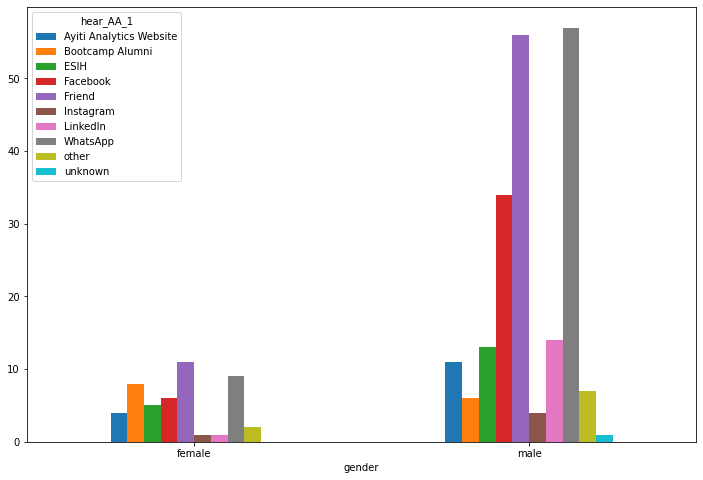

In [ ]:
#here
my_pivot2 =  pd.pivot_table(data=result5,index="gender",columns="hear_AA_1",values ="quest_id",aggfunc="count")
result5["male"] =result5["gender"].apply(lambda x: 1 if x == "male" else 0)
result5["female"] =result5["gender"].apply(lambda x: 1 if x=="female" else 0)

# Cross tabulation between GENDER and communication channel
CrosstabResult=pd.crosstab(index=result5.gender,columns=result5.hear_AA_1)
print(CrosstabResult)
 
# Grouped bar chart between GENDER and communication channel
CrosstabResult.plot.bar(figsize=(12,8), rot=0)

In [ ]:
my_pivot2.values
CrosstabResult.values

array([[ 4,  8,  5,  6, 11,  1,  1,  9,  2,  0],
       [11,  6, 13, 34, 56,  4, 14, 57,  7,  1]], dtype=int64)

In [ ]:


chi2_contingency(CrosstabResult.values)
stat, p, dof, expected = chi2_contingency(CrosstabResult.values)
  # interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('The two variables are dependent (reject Null Hypothesis H0)')
else:
    print('The two variables are independent (Null Hypothesis H0 holds true)')

p value is 0.02907484414773651
The two variables are dependent (reject Null Hypothesis H0)


### 16 Use the same method to display plot and know if is there any dependency between communication channels and Bootcamp Insterest?

In [ ]:
my_pivot3 =  pd.pivot_table(data=result5,index="after_AA",columns="hear_AA_1",values ="quest_id",aggfunc="count")

hear_AA_1                          Ayiti Analytics Website  Bootcamp Alumni  \
after_AA                                                                      
Finding a job/internship                                 1                3   
Improving my data analysis skills                        9                8   
Mentorship                                               1                0   
Switching careers                                        2                1   
Training to start my own company                         2                1   
other                                                    0                0   
unknown                                                  0                1   

hear_AA_1                          ESIH  Facebook  Friend  Instagram  \
after_AA                                                               
Finding a job/internship              2        10      10          2   
Improving my data analysis skills    12        20      38          0   


<AxesSubplot:xlabel='gender'>

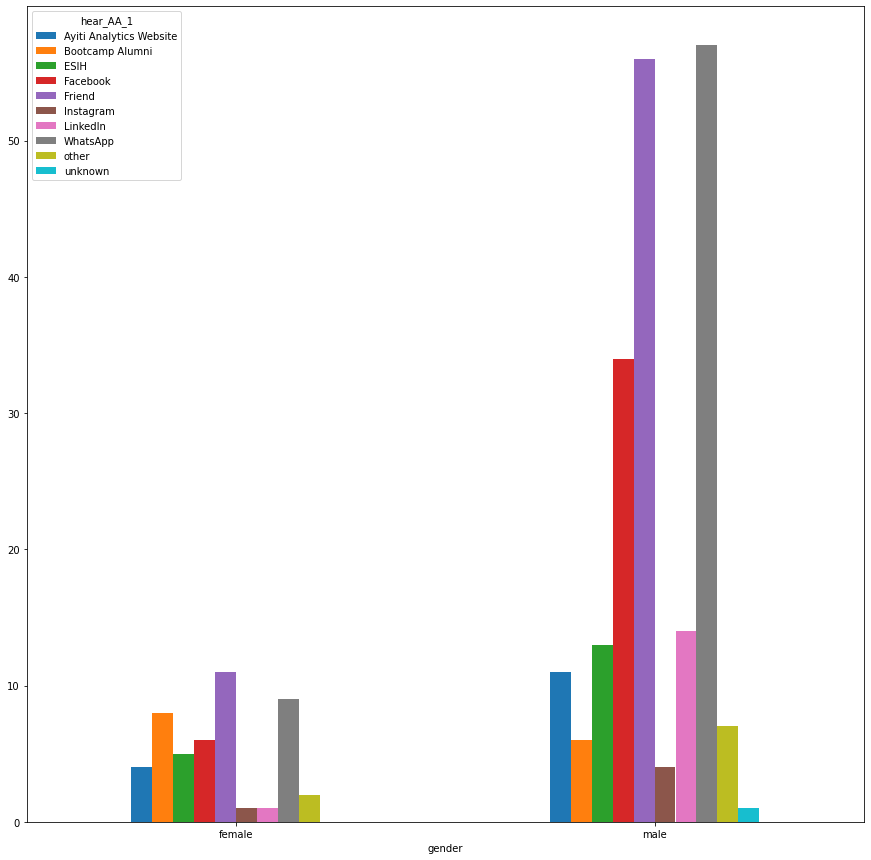

In [ ]:
# Cross tabulation between GENDER and bootcamp interest
CrosstabResult1=pd.crosstab(index=result5.after_AA,columns=result5.hear_AA_1)
print(CrosstabResult1)
 
# Grouped bar chart between GENDER and bootcamp interest
CrosstabResult.plot.bar(figsize=(15,15), rot=0)

In [ ]:
chi2_contingency(CrosstabResult1.values)
stat, p, dof, expected = chi2_contingency(CrosstabResult1.values)
  # interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('The two variables are dependent (reject Null Hypothesis H0)')
else:
    print('The two variables are independent (Null Hypothesis H0 holds true)')

p value is 2.7040922010696464e-14
The two variables are dependent (reject Null Hypothesis H0)


### 17.Plan a BA  strategy for each communication channel, Bootcamp Insterest regarding the gender 

In [ ]:
#here your codes

There is dependency between the communication channel and bootcamp interest regarding the gender. Friends and whatsapp are the communication channel  that are the most used by the applicants who want to improve their data analytics skills and to find a job after the bootcamp. I think they should think about how they can help the participants improve their skills  and achieve their goals. 

### 18.Plan a BA  strategy for each communication channel, Bootcamp Insterest regarding the gender

In [ ]:
# here your codes


There is dependency between the communication channel and bootcamp interest regarding the gender. Friends and whatsapp are the communication channel  that are the most used by the applicants who want to improve their data analytics skills and to find a job after the bootcamp. I think they should think about how they can help the participants improve their skills  and achieve their goals. 

### 19. Calculate 
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=yes)
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=no)

In [ ]:
#shape
yes=len(result5[result5["payed"]=='yes'])
no=len(result5)-yes

In [ ]:
result6=pd.pivot_table(result5[result5['payed']=="yes"],values='quest_id',index=['after_AA','hear_AA_1','gender'], aggfunc='count')
result6=result6/yes
print('Probabilities for a payed applicant by his interest for the bootcamp, his gender and his communication channel')
print(result6)

Probabilities for a payed applicant by his interest for the bootcamp, his gender and his communication channel
                                                                  quest_id
after_AA                          hear_AA_1               gender          
Finding a job/internship          Ayiti Analytics Website male    0.015385
                                  Bootcamp Alumni         female  0.015385
                                  ESIH                    male    0.015385
                                  Facebook                male    0.015385
                                  Friend                  female  0.015385
                                                          male    0.030769
                                  Instagram               male    0.015385
                                  LinkedIn                male    0.015385
                                  WhatsApp                female  0.015385
                                                          male  

In [ ]:
result7=pd.pivot_table(result5[result5['payed']=="no"],values='quest_id',index=['after_AA','hear_AA_1','gender'], aggfunc='count')
result7=result7/no
print('Probabilities for a non-payed applicant by his interest for the bootcamp, his gender and his communication channel')
print(result7)
result7

Probabilities for a non-payed applicant by his interest for the bootcamp, his gender and his communication channel
                                                                  quest_id
after_AA                          hear_AA_1               gender          
Finding a job/internship          Bootcamp Alumni         female  0.010811
                                  ESIH                    male    0.005405
                                  Facebook                female  0.010811
                                                          male    0.037838
                                  Friend                  female  0.016216
                                                          male    0.021622
                                  Instagram               male    0.005405
                                  LinkedIn                male    0.005405
                                  WhatsApp                male    0.037838
                                  other                   ma

quest_id
after_AA                          hear_AA_1               gender          
Finding a job/internship          Bootcamp Alumni         female  0.010811
                                  ESIH                    male    0.005405
                                  Facebook                female  0.010811
                                                          male    0.037838
                                  Friend                  female  0.016216
                                                          male    0.021622
                                  Instagram               male    0.005405
                                  LinkedIn                male    0.005405
                                  WhatsApp                male    0.037838
                                  other                   male    0.010811
Improving my data analysis skills Ayiti Analytics Website female  0.010811
                                                          male    0.032432
                                  Bootcamp Alumni         female  0.010811
                                  ESIH                    female  0.016216
                                                          male    0.037838
                                  Facebook                male    0.070270
                                  Friend                  female  0.021622
                                                          male    0.097297
                                  LinkedIn                male    0.043243
                                  WhatsApp                female  0.016216
                                                          male    0.108108
                                  other                   female  0.005405
                                                          male    0.010811
Mentorship                        Ayiti Analytics Website male    0.005405
                                  ESIH                    female  0.005405
                                  Facebook                female  0.010811
                                                          male    0.005405
                                  Friend                  male    0.005405
                                  WhatsApp                male    0.032432
Switching careers                 Ayiti Analytics Website female  0.005405
                                                          male    0.005405
                                  Facebook                male    0.016216
                                  Friend                  male    0.021622
                                  Instagram               male    0.005405
                                  LinkedIn                male    0.005405
                                  WhatsApp                female  0.005405
                                                          male    0.037838
Training to start my own company  Ayiti Analytics Website female  0.005405
                                  Bootcamp Alumni         female  0.005405
                                  ESIH                    female  0.005405
                                                          male    0.005405
                                  Facebook                male    0.016216
                                  Friend                  female  0.005405
                                                          male    0.054054
                                  Instagram               female  0.005405
                                                          male    0.005405
                                  LinkedIn                male    0.010811
                                  WhatsApp                female  0.005405
                                                          male    0.043243
                                  other                   male    0.005405
other                             other                   male    0.005405
unknown                           Bootcamp Alumni         male    0.005405
                

### 20 reduce 
* P(Payed="yes"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")
* P(Payed="no"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")

In [ ]:
result5['after_AA'].unique()

array(['unknown', 'Finding a job/internship',
       'Improving my data analysis skills', 'Mentorship',
       'Training to start my own company', 'Switching careers', 'other'],
      dtype=object)

In [ ]:
# here your codes
result10=result5[(result5['after_AA']=='Improving my data analysis skills')& (result5['hear_AA_1']=='Friend') & (result5['gender']=='male')]
r10=result10['payed'].value_counts(normalize=1 )
r10.rename(index={"yes":"Probability that the applicant pays knowing he wants to improve her skills, he is male and the communication channel is a friend",
'no':"Probability that the applicant doesn't pay knowing he wants to improve her skills, he is male and the communication channel is a friend"}, inplace=True)
r10

Probability that the applicant doesn't pay knowing he wants to improve her skills, he is male and the communication channel is a friend    0.5625
Probability that the applicant pays knowing he wants to improve her skills, he is male and the communication channel is a friend           0.4375
Name: payed, dtype: float64

### Based on these findings, propose strategies to increase our sales?

In [ ]:
#here your codes


If they want to increase their sales, they should focu on the friends of the bootcaamp alumni. Because the probability that the applicant pay knowing that he wants to improve his skills, he is male and his communication channel is a friend is more than 45%. It will be more benefits if the participants  of the actual bootcamp talk with their friends about Ayiti Analytics. By friends I mean in their old school, and maybe their family too.